In [ ]:

#
# Program 4.7: Restricted three-body (r3body.ipynb)
# J Wang, Computational modeling and visualization with Python
#

import ode, numpy as np     # get ODE solvers, numpy
import vpython as vp         # get VPython modules for animation
vec=vp.vector
mag = lambda x: np.sqrt(x[0]**2+x[1]**2)

def r3body(y, t):   # equations of motion for restricted 3body
    r, v = y[0], y[1]
    r1, r2 = r - [-a,0], r - [b,0]  # rel pos vectors 
    acc = -GM*(b*r1/mag(r1)**3 + a*r2/mag(r2)**3) # 
    acc += omega**2*r + 2*omega*np.array([v[1], -v[0]]) # Coriolis term 
    return np.array([v, acc])

def set_scene(r):   # r = position of test body
    vp.canvas(title='Restricted 3body', background=vec(1,1,1))
    body = vp.sphere(pos=vec(r[0],r[1],0), color=vec(0,0,1), radius=0.03, make_trail=1)
    sun = vp.sphere(pos=vec(-a,0,0), color=vec(1,0,0), radius=0.1)
    jupiter = vp.sphere(pos=vec(b, 0,0), color=vec(0,1,0), radius=0.05)
    circle = vp.ring(pos=vec(0,0,0), color=vec(0,0,0), thickness=0.005,
                     axis=vec(0,0,1), radius=1)      # unit circle
    return body
    
def restricted_3body(y):            # y = [r, v] expected
    testbody = set_scene(y[0])
    t, h = 0.0, 0.001
    while True:
        vp.rate(2000)
        y = ode.RK4(r3body, y, t, h)
        testbody.pos = vec(y[0,0],y[0,1],0)

GM, omega = 4*np.pi**2, 2*np.pi     # G(M1+M2), omega, RTB units
alpha = 0.0009542                   # Sun-Jupiter system
a, b = alpha, 1.0-alpha
r, v = [0.509046,0.883346], [0.162719,-0.0937906]     # init pos, vel
restricted_3body(np.array([r, v]))
 

In [ ]:
import ode, numpy as np     # get ODE solvers, numpy
import vpython as vp         # get VPython modules for animation
vec = vp.vector
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

def r3body(y, t):  # equations of motion for restricted 3-body
    r, v = y[0], y[1]
    r1, r2 = r - [-a, 0], r - [b, 0]  # relative position vectors 
    acc = -GM * (b * r1 / mag(r1)**3 + a * r2 / mag(r2)**3)  # acceleration
    acc += omega**2 * r + 2 * omega * np.array([v[1], -v[0]])  # Coriolis term
    return np.array([v, acc])

def set_scene(r):  # r = position of test body
    vp.canvas(title='Restricted 3-body', background=vec(1, 1, 1))
    body = vp.sphere(pos=vec(r[0], r[1], 0), color=vec(0, 0, 1), radius=0.03, make_trail=1)
    sun = vp.sphere(pos=vec(-a, 0, 0), color=vec(1, 0, 0), radius=0.1)
    jupiter = vp.sphere(pos=vec(b, 0, 0), color=vec(0, 1, 0), radius=0.05)
    circle = vp.ring(pos=vec(0, 0, 0), color=vec(0, 0, 0), thickness=0.005,
                     axis=vec(0, 0, 1), radius=1)  # unit circle
    return body

def restricted_3body(y, t_max):  # y = [r, v] expected, t_max is the maximum time limit
    testbody = set_scene(y[0])
    t, h = 0.0, 0.001
    ylst = []
    while t < t_max:
        vp.rate(2000)
        y = ode.RK4(r3body, y, t, h)
        testbody.pos = vec(y[0, 0], y[0, 1], 0)
        t += h  # update time step
        ylst.append(y)
    print(f"Simulation ended at time {t} seconds.")
    
    return ylst

# Constants
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha
r, v = [0.509046, 0.883346], [0.162719, -0.0937906]  # initial position, velocity

# Define the maximum time limit 
t_max = 10

# Run the simulation with the max time limit
ylst = restricted_3body(np.array([r, v]), t_max)
ylst

In [ ]:
import ode
import numpy as np
import vpython as vp

# get VPython modules for animation
vec = vp.vector
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

def r3body(y, t):  # equations of motion for restricted 3-body
    r, v = y[0], y[1]
    r1, r2 = r - [-a, 0], r - [b, 0]  # relative position vectors 
    acc = -GM * (b * r1 / mag(r1)**3 + a * r2 / mag(r2)**3)  # acceleration
    acc += omega**2 * r + 2 * omega * np.array([v[1], -v[0]])  # Coriolis term
    return np.array([v, acc])

def set_scene(r):  # r = position of test body
    vp.canvas(title='Restricted 3-body', background=vec(1, 1, 1))
    body = vp.sphere(pos=vec(r[0], r[1], 0), color=vec(0, 0, 1), radius=0.03, make_trail=1)
    sun = vp.sphere(pos=vec(-a, 0, 0), color=vec(1, 0, 0), radius=0.1)
    jupiter = vp.sphere(pos=vec(b, 0, 0), color=vec(0, 1, 0), radius=0.05)
    circle = vp.ring(pos=vec(0, 0, 0), color=vec(0, 0, 0), thickness=0.005,
                     axis=vec(0, 0, 1), radius=1)  # unit circle
    return body

def transform(x,y, omega):
    
    # Extract x and y coordinates from the ylst array (columns 0 and 1)
    # x, y = ylst[:, 0], ylst[:, 1]
    
    rotation_matrix = np.array([
        [np.cos(omega*t), np.sin(omega*t)],
        [-np.sin(omega*t), np.cos(omega*t)]
    ])
    
    # Apply the rotation to each (x, y) pair using matrix multiplication
    rotated_coords = np.dot(rotation_matrix.T ,np.column_stack((x, y)))
    
    return rotated_coords

def restricted_3body(y, t_max, omega):  # y = [r, v] expected, t_max is the maximum time limit
    canvas1 = vp.canvas(title='Rotating Frame', background=vec(1, 1, 1), width=600, height=600, x=0)
    canvas2 = vp.canvas(title='Non-Rotating Frame', background=vec(1, 1, 1), width=600, height=600, x=600)
    
    testbody1 = set_scene(y[0], canvas1)  # Rotating frame
    testbody2 = set_scene(y[0], canvas2)  # Non-rotating frame
    
    t, h = 0.0, 0.001
    num_steps = int(t_max / h)  # Calculate the number of time steps
    ylst = np.zeros((num_steps, 4))  # Create a NumPy array to store [x, y, vx, vy] at each step
    t_lst =[]
    step = 0
    while t < t_max and step < num_steps:
        vp.rate(2000)
        y = ode.RK4(r3body, y, t, h)
        testbody1.pos = vec(y[0, 0], y[0, 1], 0)
        
        #Testbody2
        # Store the values in the preallocated array (x, y, vx, vy)
        ylst[step, :] = np.concatenate([y[0], y[1]])  # Store position and velocity in a flat array
        i = 0
        x, y = ylst[i, 0], ylst[i, 1]
        i+= 1 
        
        transform(x,y,omega)
        
        t_lst.append(t)
        t += h  # update time step
        step += 1  # increment the step
    
    print(f"Simulation ended at time {t} seconds.")
    return ylst,t_lst



# Constants
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha
r, v = [0.509046, 0.883346], [0.162719, -0.0937906]  # initial position, velocity

# Define the maximum time limit 
t_max = 10

# Run the simulation with the max time limit
ylst,tlst = restricted_3body(np.array([r, v]), t_max, omega)
print(ylst)


In [ ]:
import ode
import numpy as np
import vpython as vp

# get VPython modules for animation
vec = vp.vector
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

def r3body(y, t):  # equations of motion for restricted 3-body
    r, v = y[0], y[1]
    r1, r2 = r - [-a, 0], r - [b, 0]  # relative position vectors 
    acc = -GM * (b * r1 / mag(r1)**3 + a * r2 / mag(r2)**3)  # acceleration
    acc += omega**2 * r + 2 * omega * np.array([v[1], -v[0]])  # Coriolis term
    return np.array([v, acc])

def set_scene(r, canvas):  # r = position of test body, canvas for rendering
    body = vp.sphere(pos=vec(r[0], r[1], 0), color=vec(0, 0, 1), radius=0.03, make_trail=1, canvas=canvas)
    sun = vp.sphere(pos=vec(-a, 0, 0), color=vec(1, 0, 0), radius=0.1, canvas=canvas)
    jupiter = vp.sphere(pos=vec(b, 0, 0), color=vec(0, 1, 0), radius=0.05, canvas=canvas)
    circle = vp.ring(pos=vec(0, 0, 0), color=vec(0, 0, 0), thickness=0.005,
                     axis=vec(0, 0, 1), radius=1, canvas=canvas)  # unit circle
    return body

def transform(x, y, omega, t):
    # Create the 2D rotation matrix for the given angle omega and time t
    rotation_matrix = np.array([
        [np.cos(omega*t), np.sin(omega*t)],
        [-np.sin(omega*t), np.cos(omega*t)]
    ])
    
    # Apply the rotation to each (x, y) pair using matrix multiplication
    rotated_coords = np.dot(rotation_matrix, np.array([x, y]))
    
    return rotated_coords

def restricted_3body(y, t_max, omega):  # y = [r, v] expected, t_max is the maximum time limit
    # Create two canvases for side-by-side animation
    canvas1 = vp.canvas(title='Rotating Frame', background=vec(1, 1, 1), width=600, height=600, x=0)
    canvas2 = vp.canvas(title='Non-Rotating Frame', background=vec(1, 1, 1), width=600, height=600, x=600)
    
    # Set up the bodies in both frames
    testbody1 = set_scene(y[0], canvas1)  # Rotating frame
    testbody2 = set_scene(y[0], canvas2)  # Non-rotating frame
    
    t, h = 0.0, 0.0005
    num_steps = int(t_max / h)  # Calculate the number of time steps
    ylst = np.zeros((num_steps, 4))  # Create a NumPy array to store [x, y, vx, vy] at each step
    t_lst = []  # List to store time steps
    intert_coords = []
    step = 0
    while t < t_max and step < num_steps:
        vp.rate(100)
        y = ode.RK4(r3body, y, t, h)
        
        # Store the values in the preallocated array (x, y, vx, vy)
        ylst[step, :] = np.concatenate([y[0], y[1]])  # Store position and velocity in a flat array
        
        # Update position for the rotating frame
        testbody1.pos = vec(y[0, 0], y[0, 1], 0)
        
        # Transform the position into the non-rotating frame
        x, y_pos = y[0, 0], y[0, 1]
        rotated_coords = transform(x, y_pos, omega, t)
        testbody2.pos = vec(rotated_coords[0], rotated_coords[1], 0)  # Update for the non-rotating frame
        
        intert_coords.append(rotated_coords)
        
        # Store the time
        t_lst.append(t)
        
        # Increment time step
        t += h  # update time step
        step += 1  # increment the step
    
    print(f"Simulation ended at time {t} seconds.")
    return ylst, t_lst


# Constants
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha
r, v = [0.509046, 0.883346], [0.162719, -0.0937906]  # initial position, velocity

# Define the maximum time limit 
t_max = 10

# Run the simulation with the max time limit
ylst, tlst = restricted_3body(np.array([r, v]), t_max, omega)
print(ylst)


In [8]:
import ode
import numpy as np
import vpython as vp
import matplotlib.pyplot as plt

# get VPython modules for animation
vec = vp.vector
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

def r3body(y, t):  # equations of motion for restricted 3-body
    r, v = y[0], y[1]
    r1, r2 = r - [-a, 0], r - [b, 0]  # relative position vectors 
    acc = -GM * (b * r1 / mag(r1)**3 + a * r2 / mag(r2)**3)  # acceleration
    acc += omega**2 * r + 2 * omega * np.array([v[1], -v[0]])  # Coriolis term
    return np.array([v, acc])

def set_scene(r, canvas):  # r = position of test body, canvas for rendering
    body = vp.sphere(pos=vec(r[0], r[1], 0), color=vec(0, 0, 1), radius=0.03, make_trail=1, canvas=canvas)
    sun = vp.sphere(pos=vec(-a, 0, 0), color=vec(1, 0, 0), radius=0.1, canvas=canvas)
    jupiter = vp.sphere(pos=vec(b, 0, 0), color=vec(0, 1, 0), radius=0.05, canvas=canvas)
    circle = vp.ring(pos=vec(0, 0, 0), color=vec(0, 0, 0), thickness=0.005,
                     axis=vec(0, 0, 1), radius=1, canvas=canvas)  # unit circle
    return body

def transform(x, y, omega, t):
    # Create the 2D rotation matrix for the given angle omega and time t
    rotation_matrix = np.array([
        [np.cos(omega*t), np.sin(omega*t)],
        [-np.sin(omega*t), np.cos(omega*t)]
    ])
    
    # Apply the rotation to each (x, y) pair using matrix multiplication
    rotated_coords = np.dot(rotation_matrix, np.array([x, y]))
    
    return rotated_coords

def restricted_3body(y, t_max, omega):  # y = [r, v] expected, t_max is the maximum time limit
    # Create two canvases for side-by-side animation
    canvas1 = vp.canvas(title='Rotating Frame', background=vec(1, 1, 1), width=600, height=600, x=0)
    canvas2 = vp.canvas(title='Non-Rotating Frame', background=vec(1, 1, 1), width=600, height=600, x=600)
    
    # Set up the bodies in both frames
    testbody1 = set_scene(y[0], canvas1)  # Rotating frame
    testbody2 = set_scene(y[0], canvas2)  # Non-rotating frame
    
    t, h = 0.0, 0.0005 # or .0002-.0001 for smoothness
    num_steps = int(t_max / h)  # Calculate the number of time steps
    ylst = np.zeros((num_steps, 4))  # Create a NumPy array to store [x, y, vx, vy] at each step
    t_lst = []  # List to store time steps
    velocities = []  # List to store velocities (magnitude)
    step = 0
    while t < t_max and step < num_steps:
        vp.rate(50) #100,50, or 20 for smooth
        y = ode.RK4(r3body, y, t, h)
        
        # Store the values in the preallocated array (x, y, vx, vy)
        ylst[step, :] = np.concatenate([y[0], y[1]])  # Store position and velocity in a flat array
        
        # Update position for the rotating frame
        testbody1.pos = vec(y[0, 0], y[0, 1], 0)
        
        # Transform the position into the non-rotating frame
        x, y_pos = y[0, 0], y[0, 1]
        rotated_coords = transform(x, y_pos, omega, t)
        testbody2.pos = vec(rotated_coords[0], rotated_coords[1], 0)  # Update for the non-rotating frame
        
        # Store the time
        t_lst.append(t)
        
        # Extract velocity components from y[1] (vx, vy) and compute the velocity magnitude
        vx, vy = y[1, 0], y[1, 1]
        velocity_magnitude = np.sqrt(vx**2 + vy**2)  # Calculate the velocity magnitude
        
        velocities.append(velocity_magnitude)  # Store the velocity

        # Increment time step
        t += h  # update time step
        step += 1  # increment the step
    
    print(f"Simulation ended at time {t} seconds.")
    return ylst, t_lst, velocities


# Constants
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha
#r, v = [0.509046, 0.883346], [0.162719, -0.0937906]  # initial position, velocity
r, v = [0.64772, 0], [0, 4.2902]
# Define the maximum time limit 
t_max = 10

# Run the simulation with the max time limit
ylst, tlst, velocities = restricted_3body(np.array([r, v]), t_max, omega)

# Plot velocity as a function of time
plt.figure(figsize=(8, 6))
plt.plot(tlst, velocities)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (units)")
plt.title("Velocity of the Test Body as a Function of Time")
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [15]:
import ode
import numpy as np
import vpython as vp
import matplotlib.pyplot as plt

# Get VPython modules for animation
vec = vp.vector
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

def two_body(y, t):  # Equations of motion for two-body problem
    r, v = y[0], y[1]  # r = position, v = velocity
    r_sun_jupiter = r - [a, 0]  # Distance from Sun to Jupiter
    acc = -GM * r_sun_jupiter / mag(r_sun_jupiter)**3  # Gravitational acceleration
    return np.array([v, acc])

def set_scene(r, canvas):  # r = position of test body, canvas for rendering
    sun = vp.sphere(pos=vec(-a, 0, 0), color=vec(1, 0, 0), radius=0.1, canvas=canvas)
    jupiter = vp.sphere(pos=vec(r[0], r[1], 0), color=vec(0, 0, 1), radius=0.05, make_trail=1, canvas=canvas)
    return jupiter

def two_body_simulation(y, t_max):  # y = [r, v], t_max is the maximum time limit
    # Create a canvas for the animation
    canvas = vp.canvas(title='Jupiter Orbiting the Sun', background=vec(1, 1, 1), width=600, height=600)

    # Set up the Sun and Jupiter in the scene
    jupiter = set_scene(y[0], canvas)  # Initial Jupiter position
    
    t, h = 0.0, 0.0005  # Time step
    num_steps = int(t_max / h)  # Number of time steps
    ylst = np.zeros((num_steps, 4))  # Array to store [x, y, vx, vy] at each step
    t_lst = []  # List to store time steps
    step = 0
    while t < t_max and step < num_steps:
        vp.rate(50)  # Set animation speed
        y = ode.RK4(two_body, y, t, h)  # Runge-Kutta method for solving the ODE
        
        # Store position and velocity
        ylst[step, :] = np.concatenate([y[0], y[1]])  # Store position and velocity in a flat array
        
        # Update the position of Jupiter
        jupiter.pos = vec(y[0, 0], y[0, 1], 0)
        
        # Store time
        t_lst.append(t)
        
        # Increment time step
        t += h
        step += 1
    
    print(f"Simulation ended at time {t} seconds.")
    return ylst, t_lst

# Constants
GM = 4 * np.pi**2  # Gravitational constant * mass (in appropriate units)
a = 0.0009542  # Sun-Jupiter system distance (in AU)
b = 1.0 - a  # Distance for Jupiter from the Sun
r, v = [b, 0], [0, 2*np.pi]  # Initial position and velocity of Jupiter (circular orbit)

# Define the maximum time limit
t_max = 10

# Run the simulation
ylst, tlst = two_body_simulation(np.array([r, v]), t_max)

# Plot the orbit of Jupiter (x vs y)
plt.figure(figsize=(8, 6))
plt.plot(ylst[:, 0], ylst[:, 1])
plt.xlabel("X Position (AU)")
plt.ylabel("Y Position (AU)")
plt.title("Orbit of Jupiter Around the Sun")
plt.grid(True)
plt.axis('equal')
plt.show()


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [18]:
import ode
import numpy as np
import vpython as vp
import matplotlib.pyplot as plt

# Get VPython modules for animation
vec = vp.vector
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

# Gravitational constant (in appropriate units)
GM = 4 * np.pi**2

def two_body_with_barycenter(y, t):
    # y[0] = position of Sun, y[1] = velocity of Sun
    # y[2] = position of Jupiter, y[3] = velocity of Jupiter
    # y[0], y[2] are position vectors (x, y)
    # y[1], y[3] are velocity vectors (vx, vy)
    
    r_sun_jupiter = y[2] - y[0]  # Vector from Sun to Jupiter
    dist = mag(r_sun_jupiter)  # Distance between Sun and Jupiter
    
    # Gravitational force from each other
    force = -GM * r_sun_jupiter / dist**3
    
    # Update velocity and position for Sun
    acc_sun = force
    acc_jupiter = -force  # Newton's Third Law (equal and opposite force)
    
    # The velocity of Sun and Jupiter will be updated
    return np.array([y[1], acc_sun, y[3], acc_jupiter])

def set_scene(y, canvas):
    # Create Sun and Jupiter
    sun = vp.sphere(pos=vec(y[0][0], y[0][1], 0), color=vec(1, 0, 0), radius=0.1, canvas=canvas)
    jupiter = vp.sphere(pos=vec(y[2][0], y[2][1], 0), color=vec(0, 0, 1), radius=0.05, make_trail=1, canvas=canvas)
    return sun, jupiter

def two_body_simulation(y, t_max):
    # Create a canvas for the animation
    canvas = vp.canvas(title='Sun and Jupiter Orbiting Barycenter', background=vec(1, 1, 1), width=600, height=600)

    # Set up the Sun and Jupiter in the scene
    sun, jupiter = set_scene(y, canvas)  # Initial Sun and Jupiter positions
    
    t, h = 0.0, 0.0001  # Smaller time step for numerical stability
    num_steps = int(t_max / h)  # Number of time steps
    ylst = np.zeros((num_steps, 8))  # Array to store positions and velocities
    t_lst = []  # List to store time steps
    step = 0
    while t < t_max and step < num_steps:
        vp.rate(50)  # Set animation speed
        y = ode.RK4(two_body_with_barycenter, y, t, h)  # Runge-Kutta method
        
        # Store positions and velocities
        ylst[step, :] = np.concatenate([y[0], y[1], y[2], y[3]])  # Store positions and velocities
        
        # Update the positions of Sun and Jupiter
        sun.pos = vec(y[0][0], y[0][1], 0)
        jupiter.pos = vec(y[2][0], y[2][1], 0)
        
        # Store time
        t_lst.append(t)
        
        # Increment time step
        t += h
        step += 1
    
    print(f"Simulation ended at time {t} seconds.")
    return ylst, t_lst

# Constants
M_sun = 1.0  # Sun mass (in arbitrary units)
M_jupiter = 0.0009542  # Jupiter mass (in arbitrary units)
a = 0.0009542  # Distance from Sun to Jupiter (in AU)

# Calculate the initial velocity for Jupiter using the orbital velocity formula
v_jupiter = np.sqrt(GM / a)  # Circular orbital velocity of Jupiter

# Calculate the velocity of the Sun using conservation of momentum
v_sun = np.array([-M_jupiter / M_sun * v_jupiter, 0])  # Sun's velocity opposite to Jupiter's velocity

# Initial positions: Sun at origin, Jupiter at distance 'a' along x-axis
r_sun = [0, 0]  # Sun's initial position
r_jupiter = [a, 0]  # Jupiter's initial position

# Initial state vector y = [position_sun, velocity_sun, position_jupiter, velocity_jupiter]
y_init = [np.array(r_sun), np.array(v_sun), np.array(r_jupiter), np.array([0, v_jupiter])]

# Define the maximum time limit
t_max = 10  # Simulation time (in arbitrary units)

# Run the simulation
ylst, tlst = two_body_simulation(y_init, t_max)

# Plot the orbits of Sun and Jupiter (x vs y)
plt.figure(figsize=(8, 6))
plt.plot(ylst[:, 0], ylst[:, 1], label="Sun's path", color="red")  # Path of the Sun
plt.plot(ylst[:, 2], ylst[:, 3], label="Jupiter's path", color="blue")  # Path of Jupiter
plt.xlabel("X Position (AU)")
plt.ylabel("Y Position (AU)")
plt.title("Orbits of the Sun and Jupiter Around the Barycenter")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

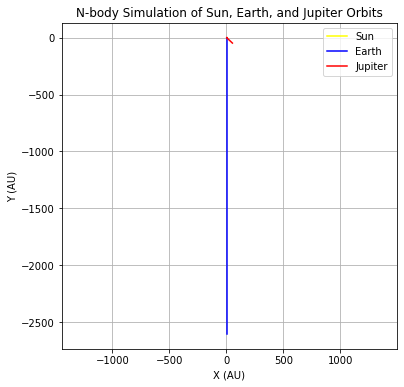

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Gravitational constant in AU^3 / (day^2 * M_sun)
G = 4 * np.pi**2

# Function to calculate the total force on each body due to the other bodies
def calculate_forces(positions, masses, softening=1e-10):
    n = len(masses)
    forces = np.zeros_like(positions)
    
    for i in range(n):
        force = np.zeros(3)
        for j in range(n):
            if i != j:
                # Calculate the vector difference between positions
                r_ij = positions[i] - positions[j]
                r_ij_mag = np.linalg.norm(r_ij)
                
                # Add a softening term to prevent division by zero
                if r_ij_mag > softening:
                    force += -G * masses[i] * masses[j] * r_ij / r_ij_mag**3
                else:
                    # When the bodies are extremely close, assign a small force
                    force += np.zeros(3)  # Or handle as you desire

        forces[i] = force
    
    return forces


# Runge-Kutta 4th order method to integrate the system
def rk4_step(positions, velocities, masses, dt):
    # First, calculate the initial forces
    forces = calculate_forces(positions, masses)
    
    # k1 - initial velocities and accelerations
    k1_pos = velocities
    k1_vel = forces / masses[:, None]
    
    # k2 - estimated mid-step position and velocity
    k2_pos = velocities + 0.5 * dt * k1_vel
    k2_vel = calculate_forces(positions + 0.5 * dt * k1_pos, masses) / masses[:, None]
    
    # k3 - another estimate of mid-step position and velocity
    k3_pos = velocities + 0.5 * dt * k2_vel
    k3_vel = calculate_forces(positions + 0.5 * dt * k2_pos, masses) / masses[:, None]
    
    # k4 - final estimate of position and velocity
    k4_pos = velocities + dt * k3_vel
    k4_vel = calculate_forces(positions + dt * k3_pos, masses) / masses[:, None]
    
    # Update positions and velocities
    new_positions = positions + (dt / 6) * (k1_pos + 2*k2_pos + 2*k3_pos + k4_pos)
    new_velocities = velocities + (dt / 6) * (k1_vel + 2*k2_vel + 2*k3_vel + k4_vel)
    
    return new_positions, new_velocities

# Simulation parameters
n = 3  # Number of bodies (for example, Sun, Earth, Jupiter)
time_step = 0.01  # Time step for integration (in years)
t_max = 10  # Total simulation time (in years)
num_steps = int(t_max / time_step)

# Initial positions (in AU), initial velocities (in AU/year), and masses (in M_sun)
positions = np.array([[1.0, 0.0, 0.0],  # Position of Sun
                      [1.0, 0.0, 0.0],  # Position of Earth
                      [5.2, 0.0, 0.0]])  # Position of Jupiter

velocities = np.array([[0.0, 0.0, 0.0],  # Sun is stationary
                       [0.0, 2 * np.pi, 0.0],  # Earth velocity for circular orbit
                       [0.0, 2 * np.pi / 11.86, 0.0]])  # Jupiter velocity for circular orbit

masses = np.array([1.0, 3e-6, 1e-3])  # Masses (in M_sun)

# Arrays to store positions for plotting
history_positions = np.zeros((num_steps, n, 3))

# Main integration loop
for step in range(num_steps):
    positions, velocities = rk4_step(positions, velocities, masses, time_step)
    history_positions[step] = positions  # Store the current positions

# Plot the orbits
plt.figure(figsize=(6, 6))
plt.plot(history_positions[:, 0, 0], history_positions[:, 0, 1], label="Sun", color="yellow")
plt.plot(history_positions[:, 1, 0], history_positions[:, 1, 1], label="Earth", color="blue")
plt.plot(history_positions[:, 2, 0], history_positions[:, 2, 1], label="Jupiter", color="red")

plt.xlabel("X (AU)")
plt.ylabel("Y (AU)")
plt.title("N-body Simulation of Sun, Earth, and Jupiter Orbits")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [ ]:
import ode, numpy as np     # get ODE solvers, numpy
import vpython as vp         # get VPython modules for animation
vec = vp.vector
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

def r3body(y, t):   # equations of motion for restricted 3body
    r, v = y[0], y[1]
    r1, r2 = r - [-a, 0], r - [b, 0]  # relative position vectors 
    
    # Acceleration due to gravity (restricted 3-body problem)
    acc = -GM * (b * r1 / mag(r1)**3 + a * r2 / mag(r2)**3)
    
    # Coriolis and centrifugal terms (from rotating reference frame)
    acc += omega**2 * r + 2 * omega * np.array([v[1], -v[0]])  # Coriolis term 
    
    return np.array([v, acc])

def set_scene(r):   # r = position of test body
    vp.canvas(title='Restricted 3body', background=vec(1, 1, 1))
    body = vp.sphere(pos=vec(r[0], r[1], 0), color=vec(0, 0, 1), radius=0.03, make_trail=1)
    sun = vp.sphere(pos=vec(-a, 0, 0), color=vec(1, 0, 0), radius=0.1)
    jupiter = vp.sphere(pos=vec(b, 0, 0), color=vec(0, 1, 0), radius=0.05, make_trail=1)
    circle = vp.ring(pos=vec(0, 0, 0), color=vec(0, 0, 0), thickness=0.005,
                     axis=vec(0, 0, 1), radius=1)  # unit circle
    return body

def restricted_3body(y):  # y = [r, v] expected
    testbody = set_scene(y[0])
    t, h = 0.0, 0.001
    while True:
        vp.rate(2000)
        y = ode.RK4(r3body, y, t, h)
        testbody.pos = vec(y[0, 0], y[0, 1], 0)

def coord_transform(r, t):
    """
    Function to transform coordinates to a rotating frame.
    Given a position `r` in the inertial frame, returns the coordinates
    in the rotating frame at time `t`, considering the rotation rate `omega`.
    """
    rotation_matrix = np.array([[np.cos(alpha * t), np.sin(alpha * t)],
                                [-np.sin(alpha * t), np.cos(alpha * t)]])
    r_rot = np.dot(rotation_matrix, r)
    return r_rot

# Constants and initial values
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542                    # Sun-Jupiter system
a, b = alpha, 1.0 - alpha
r, v = [0.509046, 0.883346], [0.162719, -0.0937906]  # Initial position, velocity

# Run the restricted three-body simulation
restricted_3body(np.array([r, v]))


In [ ]:
test = np.array([r, v])
radii = test[:,0]
print(coord_transform(radii, 10))
print(radii)

In [ ]:
import ode, numpy as np     # get ODE solvers, numpy
import vpython as vp         # get VPython modules for animation
vec = vp.vector
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

# Equations of motion in the non-rotating (inertial) frame
def r3body(y, t):   
    r, v = y[0], y[1]
    r1, r2 = r - [-a, 0], r - [b, 0]  # relative position vectors 
    
    # Gravitational acceleration in the inertial frame
    acc = -GM * (b * r1 / mag(r1)**3 + a * r2 / mag(r2)**3)
    
    return np.array([v, acc])

def set_scene(r):   # r = position of test body
    vp.canvas(title='Restricted 3body (Inertial Frame)', background=vec(1, 1, 1))
    body = vp.sphere(pos=vec(r[0], r[1], 0), color=vec(0, 0, 1), radius=0.03, make_trail=1)
    sun = vp.sphere(pos=vec(-a, 0, 0), color=vec(1, 0, 0), radius=0.1)
    jupiter = vp.sphere(pos=vec(b, 0, 0), color=vec(0, 1, 0), radius=0.05, make_trail=1)
    circle = vp.ring(pos=vec(0, 0, 0), color=vec(0, 0, 0), thickness=0.005,
                     axis=vec(0, 0, 1), radius=1)  # unit circle
    return body

def restricted_3body(y):  # y = [r, v] expected
    testbody = set_scene(y[0])
    t, h = 0.0, 0.001
    while True:
        vp.rate(2000)
        y = ode.RK4(r3body, y, t, h)
        testbody.pos = vec(y[0, 0], y[0, 1], 0)
        
def coord_transform(r, t):
    """
    Function to transform coordinates to a rotating frame.
    Given a position `r` in the inertial frame, returns the coordinates
    in the rotating frame at time `t`, considering the rotation rate `omega`.
    """
    r = r[:,0]
    rotation_matrix = np.array([[np.cos(alpha * t), np.sin(alpha * t)],
                                [-np.sin(alpha * t), np.cos(alpha * t)]])
    r_rot = np.dot(rotation_matrix, r)
    return r_rot

# Constants and initial values
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542                    # Sun-Jupiter system
a, b = alpha, 1.0 - alpha
r, v = [0.64772, 0], [0, 4.2902]  # Initial position, velocity

# Run the restricted three-body simulation in the non-rotating frame
restricted_3body(np.array([r, v]))


In [ ]:
import numpy as np
import vpython as vp
from scipy.integrate import odeint  # You can also use scipy's odeint for solving ODEs

# Constants for the system
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542                    # Sun-Jupiter system
a, b = alpha, 1.0 - alpha
r, v = [0.64772, 0], [0, 4.2902]  # Initial position, velocity

# Equations of motion in the non-rotating (inertial) frame
def r3body(y, t):
    r, v = y[0:2], y[2:4]
    r1, r2 = r - np.array([-a, 0]), r - np.array([b, 0])  # relative position vectors
    acc = -GM * (b * r1 / np.linalg.norm(r1)**3 + a * r2 / np.linalg.norm(r2)**3)  # gravitational acceleration
    return [v[0], v[1], acc[0], acc[1]]

# Set up the vpython scene
def set_scene():
    # Create the Sun, Jupiter, and Test Body
    scene = vp.canvas(title='Restricted 3body (Inertial Frame)', background=vp.color.white)
    
    # Create Sun and Jupiter as spheres
    sun = vp.sphere(pos=vp.vector(-a, 0, 0), color=vp.color.red, radius=0.1)
    jupiter = vp.sphere(pos=vp.vector(b, 0, 0), color=vp.color.green, radius=0.05, make_trail=True)
    
    # Create a trail for the test body
    test_body = vp.sphere(pos=vp.vector(r[0], r[1], 0), color=vp.color.blue, radius=0.03, make_trail=True)
    
    # Optional: Draw a circle to represent the orbital path of the test body
    circle = vp.ring(pos=vp.vector(0, 0, 0), color=vp.color.black, thickness=0.005, axis=vp.vector(0, 0, 1), radius=1)
    
    return scene, test_body, sun, jupiter

# Function to update the test body's position in the simulation
def update_test_body_position(test_body, solution, t):
    # Extract the position of the test body from the solution
    x, y = solution[int(t), 0], solution[int(t), 1]
    test_body.pos = vp.vector(x, y, 0)

# Run the simulation
def restricted_3body(initial_conditions):
    # Set up the scene and bodies
    scene, test_body, sun, jupiter = set_scene()
    
    # Time vector for integration
    t = np.linspace(0, 10, 10000)  # Integrating for 10 units of time (adjust as needed)
    
    # Solve the system of ODEs using odeint from scipy
    # initial_conditions = [r0, v0] where r0 is the initial position and v0 is the initial velocity
    initial_state = np.array([initial_conditions[0][0], initial_conditions[0][1], initial_conditions[1][0], initial_conditions[1][1]])
    solution = odeint(r3body, initial_state, t)
    
    # Animate the solution
    for i in range(len(t)):
        vp.rate(60)  # control the speed of the animation
        update_test_body_position(test_body, solution, i)  # Update the position of the test body
        
# Initial conditions
initial_conditions = ([0.64772, 0], [0, 4.2902])  # Initial position and velocity

# Run the simulation
restricted_3body(initial_conditions)


In [ ]:
import numpy as np
import vpython as vp
from scipy.integrate import odeint

# Constants for the system
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha
r, v = [0.64772, 0], [0, 4.2902]  # Initial position, velocity

# Equations of motion in the non-rotating (inertial) frame
def r3body(y, t):
    r, v = y[0:2], y[2:4]
    r1, r2 = r - np.array([-a, 0]), r - np.array([b, 0])  # relative position vectors
    acc = -GM * (b * r1 / np.linalg.norm(r1)**3 + a * r2 / np.linalg.norm(r2)**3)  # gravitational acceleration
    return [v[0], v[1], acc[0], acc[1]]

# Function to update the scene with the positions of Sun, Jupiter, and the test body
def set_scene():
    # Create the Sun, Jupiter, and Test Body
    scene = vp.canvas(title='Restricted 3body (Inertial Frame)', background=vp.color.white)
    
    # Create Sun and Jupiter as spheres
    sun = vp.sphere(pos=vp.vector(-a, 0, 0), color=vp.color.red, radius=0.1)
    jupiter = vp.sphere(pos=vp.vector(b, 0, 0), color=vp.color.green, radius=0.05, make_trail=True)
    
    # Create a trail for the test body
    test_body = vp.sphere(pos=vp.vector(r[0], r[1], 0), color=vp.color.blue, radius=0.03, make_trail=True)
    
    # Optional: Draw a circle to represent the orbital path of the test body
    circle = vp.ring(pos=vp.vector(0, 0, 0), color=vp.color.black, thickness=0.005, axis=vp.vector(0, 0, 1), radius=1)
    
    return scene, test_body, sun, jupiter

# Function to update the test body's position in the simulation
def update_test_body_position(test_body, solution, t):
    # Extract the position of the test body from the solution
    x, y = solution[int(t), 0], solution[int(t), 1]
    test_body.pos = vp.vector(x, y, 0)

# Function to update Jupiter's position based on its orbital motion around the Sun
def update_jupiter_position(jupiter, t):
    # Use the motion of Jupiter from the solution
    # Jupiter's position will be updated from the integration solution for the Sun-Jupiter system
    # Here we assume Jupiter's motion is along a circular orbit (kept at distance b from the Sun)
    jupiter.pos = vp.vector(b * np.cos(omega * t), b * np.sin(omega * t), 0)

# Run the simulation
def restricted_3body(initial_conditions):
    # Set up the scene and bodies
    scene, test_body, sun, jupiter = set_scene()
    
    # Time vector for integration
    t = np.linspace(0, 10, 10000)  # Integrating for 10 units of time (adjust as needed)
    
    # Solve the system of ODEs using odeint from scipy
    initial_state = np.array([initial_conditions[0][0], initial_conditions[0][1], initial_conditions[1][0], initial_conditions[1][1]])
    solution = odeint(r3body, initial_state, t)
    
    # Animate the solution
    for i in range(len(t)):
        vp.rate(60)  # control the speed of the animation
        
        # Update positions of the bodies
        update_test_body_position(test_body, solution, i)  # Update the test body position
        update_jupiter_position(jupiter, t[i])  # Update Jupiter's position (orbital motion)
        
# Initial conditions
initial_conditions = ([0.64772, 0], [0, 4.2902])  # Initial position and velocity

# Run the simulation
restricted_3body(initial_conditions)


In [ ]:
import numpy as np
import vpython as vp
from scipy.integrate import odeint

# Constants for the system
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha
r, v = [0.64772, 0], [0, 4.2902]  # Initial position, velocity

# Gravitational constant (scaled for the system)
G = 1.0  # This can be adjusted as needed
M_sun = 1.0  # Mass of the Sun (scaled)
M_jupiter = 0.0009542  # Mass of Jupiter (scaled)

# Equations of motion in the non-rotating (inertial) frame
def r3body(y, t):
    # Extract positions and velocities
    r_test, v_test = y[0:2], y[2:4]
    
    # Position of the Sun and Jupiter
    r_sun = np.array([-a, 0])  # Sun at (-a, 0)
    r_jupiter = np.array([b, 0])  # Jupiter at (b, 0)
    
    # Relative positions of the test body with respect to Sun and Jupiter
    r_sun_test = r_test - r_sun
    r_jupiter_test = r_test - r_jupiter
    
    # Accelerations due to gravitational forces from Sun and Jupiter
    acc_sun = -GM * M_sun * r_sun_test / np.linalg.norm(r_sun_test)**3
    acc_jupiter = -GM * M_jupiter * r_jupiter_test / np.linalg.norm(r_jupiter_test)**3
    
    # Total acceleration on the test body
    acc_total = acc_sun + acc_jupiter
    
    return [v_test[0], v_test[1], acc_total[0], acc_total[1]]

# Function to set up the scene with bodies
def set_scene():
    scene = vp.canvas(title='Restricted 3body (Inertial Frame)', background=vp.color.white)
    
    # Create Sun and Jupiter as spheres
    sun = vp.sphere(pos=vp.vector(-a, 0, 0), color=vp.color.red, radius=0.1)
    jupiter = vp.sphere(pos=vp.vector(b, 0, 0), color=vp.color.green, radius=0.05, make_trail=True)
    
    # Create a trail for the test body
    test_body = vp.sphere(pos=vp.vector(r[0], r[1], 0), color=vp.color.blue, radius=0.03, make_trail=True)
    
    return scene, test_body, sun, jupiter

# Function to update the position of the test body
def update_test_body_position(test_body, solution, t):
    x, y = solution[int(t), 0], solution[int(t), 1]
    test_body.pos = vp.vector(x, y, 0)

# Function to update the position of Jupiter (orbital motion around the Sun)
def update_jupiter_position(jupiter, t):
    jupiter.pos = vp.vector(b * np.cos(omega * t), b * np.sin(omega * t), 0)

# Run the simulation
def restricted_3body(initial_conditions):
    scene, test_body, sun, jupiter = set_scene()
    
    # Time vector for integration
    t = np.linspace(0, 10, 10000)  # Integrating for 10 units of time (adjust as needed)
    
    # Solve the system of ODEs using odeint from scipy
    initial_state = np.array([initial_conditions[0][0], initial_conditions[0][1], initial_conditions[1][0], initial_conditions[1][1]])
    solution = odeint(r3body, initial_state, t)
    
    # Animate the solution
    for i in range(len(t)):
        vp.rate(60)  # control the speed of the animation
        
        # Update positions of the bodies
        update_test_body_position(test_body, solution, i)  # Update the test body position
        update_jupiter_position(jupiter, t[i])  # Update Jupiter's position (orbital motion)

# Initial conditions
initial_conditions = ([0.64772, 0], [0, 4.2902])  # Initial position and velocity

# Run the simulation
restricted_3body(initial_conditions)


In [ ]:
import numpy as np
import vpython as vp
from scipy.integrate import odeint

# Constants for the system
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha  # Sun and Jupiter positions (scaled)
r, v = [0.64772, 0], [0, 4.2902]  # Initial position, velocity for the test body

# Gravitational constant (scaled for the system)
G = 1.0  # This can be adjusted as needed
M_sun = 1.0  # Mass of the Sun (scaled)
#M_jupiter = 0.0009542  # Mass of Jupiter (scaled)
M_jupiter = .5
# Equations of motion in the non-rotating (inertial) frame
def r3body(y, t):
    # Extract positions and velocities from state vector y
    r_test, v_test = y[0:2], y[2:4]
    
    # Position of the Sun and Jupiter (fixed positions)
    r_sun = np.array([-a, 0])  # Sun at (-a, 0)
    r_jupiter = np.array([b, 0])  # Jupiter at (b, 0)
    
    # Relative positions of the test body with respect to Sun and Jupiter
    r_sun_test = r_test - r_sun
    r_jupiter_test = r_test - r_jupiter
    
    # Accelerations due to gravitational forces from Sun and Jupiter
    acc_sun = -GM * M_sun * r_sun_test / np.linalg.norm(r_sun_test)**3
    acc_jupiter = -GM * M_jupiter * r_jupiter_test / np.linalg.norm(r_jupiter_test)**3
    
    # Total acceleration on the test body (combined gravitational influences)
    acc_total = acc_sun + acc_jupiter
    
    return [v_test[0], v_test[1], acc_total[0], acc_total[1]]

# Function to set up the scene with bodies
def set_scene():
    scene = vp.canvas(title='Restricted 3body (Inertial Frame)', background=vp.color.white)
    
    # Create Sun and Jupiter as spheres
    sun = vp.sphere(pos=vp.vector(-a, 0, 0), color=vp.color.red, radius=0.1)
    jupiter = vp.sphere(pos=vp.vector(b, 0, 0), color=vp.color.green, radius=0.05, make_trail=True)
    
    # Create a trail for the test body
    test_body = vp.sphere(pos=vp.vector(r[0], r[1], 0), color=vp.color.blue, radius=0.03, make_trail=True)
    
    return scene, test_body, sun, jupiter

# Function to update the position of the test body
def update_test_body_position(test_body, solution, t):
    x, y = solution[int(t), 0], solution[int(t), 1]
    test_body.pos = vp.vector(x, y, 0)

# Function to update the position of Jupiter (orbital motion around the Sun)
def update_jupiter_position(jupiter, t):
    jupiter.pos = vp.vector(b * np.cos(omega * t), b * np.sin(omega * t), 0)

# Run the simulation
def restricted_3body(initial_conditions):
    scene, test_body, sun, jupiter = set_scene()
    
    # Time vector for integration
    t = np.linspace(0, 10, 10000)  # Integrating for 10 units of time (adjust as needed)
    
    # Solve the system of ODEs using odeint from scipy
    initial_state = np.array([initial_conditions[0][0], initial_conditions[0][1], initial_conditions[1][0], initial_conditions[1][1]])
    solution = odeint(r3body, initial_state, t)
    
    # Animate the solution
    for i in range(len(t)):
        vp.rate(60)  # Control the speed of the animation
        
        # Update positions of the bodies
        update_test_body_position(test_body, solution, i)  # Update the test body position
        update_jupiter_position(jupiter, t[i])  # Update Jupiter's position (orbital motion)

# Initial conditions for the test body (position and velocity)
initial_conditions = ([0.64772, 0], [0, 4.2902])  # Initial position and velocity of the test body

# Run the simulation
restricted_3body(initial_conditions)


In [ ]:
import numpy as np
import vpython as vp
from scipy.integrate import odeint

# Constants for the system
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha  # Sun and Jupiter positions (scaled)

# Gravitational constant (scaled for the system)
G = 1.0  # This can be adjusted as needed
M_sun = 1.0  # Mass of the Sun (scaled)
M_jupiter = 0.0009542  # Mass of Jupiter (scaled)

# Equations of motion in the non-rotating (inertial) frame
def r3body(y, t):
    # Extract positions and velocities from state vector y
    r_jupiter, v_jupiter = y[0:2], y[2:4]
    
    # Position of the Sun (fixed) at origin
    r_sun = np.array([0, 0])  # Sun at (0, 0)
    
    # Relative position of Jupiter with respect to Sun
    r_sun_jupiter = r_jupiter - r_sun
    
    # Gravitational acceleration due to the Sun
    acc_sun = -GM * M_sun * r_sun_jupiter / np.linalg.norm(r_sun_jupiter)**3
    
    return [v_jupiter[0], v_jupiter[1], acc_sun[0], acc_sun[1]]

# Function to set up the scene with bodies
def set_scene():
    scene = vp.canvas(title='Jupiter Orbiting the Sun (Inertial Frame)', background=vp.color.white)
    
    # Create Sun and Jupiter as spheres
    sun = vp.sphere(pos=vp.vector(0, 0, 0), color=vp.color.red, radius=0.1)
    jupiter = vp.sphere(pos=vp.vector(b, 0, 0), color=vp.color.green, radius=0.05, make_trail=True)
    
    return scene, jupiter, sun

# Function to update the position of Jupiter
def update_jupiter_position(jupiter, solution, t):
    x, y = solution[int(t), 0], solution[int(t), 1]
    jupiter.pos = vp.vector(x, y, 0)

# Run the simulation
def jupiter_orbit(initial_conditions):
    scene, jupiter, sun = set_scene()
    
    # Time vector for integration
    t = np.linspace(0, 10, 10000)  # Integrating for 10 units of time (adjust as needed)
    
    # Solve the system of ODEs using odeint from scipy
    initial_state = np.array([initial_conditions[0][0], initial_conditions[0][1], initial_conditions[1][0], initial_conditions[1][1]])
    solution = odeint(r3body, initial_state, t)
    
    # Animate the solution
    for i in range(len(t)):
        vp.rate(60)  # Control the speed of the animation
        
        # Update positions of the bodies (Jupiter's position)
        update_jupiter_position(jupiter, solution, i)

# Initial conditions for Jupiter's orbit (position and velocity)
initial_conditions = ([b, 0], [0, 2 * np.pi])  # Initial position and velocity of Jupiter (velocity adjusted for circular orbit)

# Run the simulation
jupiter_orbit(initial_conditions)


In [ ]:
import numpy as np
import vpython as vp
from scipy.integrate import odeint

# Constants for the system
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha  # Sun and Jupiter positions (scaled)
r, v = [0.64772, 0], [0, 4.2902]  # Initial position, velocity for the test body

# Gravitational constant (scaled for the system)
G = 1.0  # This can be adjusted as needed
M_sun = 1.0  # Mass of the Sun (scaled)
#M_jupiter = .5  # Mass of Jupiter (scaled)
M_jupiter = (1.898*(10**27))/(1.989*(10**30))
# Equations of motion in the non-rotating (inertial) frame
def r3body(y, t):
    # Extract positions and velocities from state vector y
    r_test, v_test, r_jupiter, v_jupiter = y[0:2], y[2:4], y[4:6], y[6:8]
    
    # Position of the Sun (fixed at origin)
    r_sun = np.array([0, 0])  # Sun at origin (0, 0)
    
    # Relative positions of the test body with respect to Sun and Jupiter
    r_sun_test = r_test - r_sun
    r_jupiter_test = r_test - r_jupiter
    
    # Accelerations due to gravitational forces from Sun and Jupiter
    acc_sun = -GM * M_sun * r_sun_test / np.linalg.norm(r_sun_test)**3
    acc_jupiter = -GM * M_jupiter * r_jupiter_test / np.linalg.norm(r_jupiter_test)**3
    
    # Total acceleration on the test body (combined gravitational influences)
    acc_total = acc_sun + acc_jupiter
    
    # Update the acceleration of Jupiter (motion around Sun)
    r_sun_jupiter = r_jupiter - r_sun  # Relative position of Jupiter to Sun
    acc_jupiter_sun = -GM * M_sun * r_sun_jupiter / np.linalg.norm(r_sun_jupiter)**3
    
    # Return the state derivatives (velocity and acceleration)
    return [v_test[0], v_test[1], acc_total[0], acc_total[1], v_jupiter[0], v_jupiter[1], acc_jupiter_sun[0], acc_jupiter_sun[1]]

# Function to set up the scene with bodies
def set_scene():
    scene = vp.canvas(title='Restricted 3body (Inertial Frame)', background=vp.color.white)
    
    # Create Sun and Jupiter as spheres
    sun = vp.sphere(pos=vp.vector(0, 0, 0), color=vp.color.red, radius=0.1)
    jupiter = vp.sphere(pos=vp.vector(b, 0, 0), color=vp.color.green, radius=0.05, make_trail=True)
    
    # Create a trail for the test body
    test_body = vp.sphere(pos=vp.vector(r[0], r[1], 0), color=vp.color.blue, radius=0.03, make_trail=True)
    
    return scene, test_body, sun, jupiter

# Function to update the position of the test body
def update_test_body_position(test_body, solution, t):
    x, y = solution[int(t), 0], solution[int(t), 1]
    test_body.pos = vp.vector(x, y, 0)

# Function to update the position of Jupiter (orbital motion around the Sun)
def update_jupiter_position(jupiter, solution, t):
    x_jupiter, y_jupiter = solution[int(t), 4], solution[int(t), 5]
    jupiter.pos = vp.vector(x_jupiter, y_jupiter, 0)

# Run the simulation
def restricted_3body(initial_conditions):
    scene, test_body, sun, jupiter = set_scene()
    
    # Time vector for integration
    t = np.linspace(0, 10, 10000)  # Integrating for 10 units of time (adjust as needed)
    
    # Solve the system of ODEs using odeint from scipy
    initial_state = np.array([initial_conditions[0][0], initial_conditions[0][1], initial_conditions[1][0], initial_conditions[1][1], b, 0, 0, 2 * np.pi * b])  # Jupiter's initial position and velocity
    solution = odeint(r3body, initial_state, t)
    
    # Animate the solution
    for i in range(len(t)):
        vp.rate(60)  # Control the speed of the animation
        
        # Update positions of the bodies
        update_test_body_position(test_body, solution, i)  # Update the test body position
        update_jupiter_position(jupiter, solution, i)  # Update Jupiter's position (orbital motion)

# Initial conditions for the test body (position and velocity)
initial_conditions = ([0.64772, 0], [0, 4.2902])  # Initial position and velocity of the test body

# Run the simulation
restricted_3body(initial_conditions)


In [ ]:
import numpy as np
import vpython as vp
from scipy.integrate import odeint

# Constants for the system
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha  # Sun and Jupiter positions (scaled)
r, v = [0.64772, 0], [0, 4.2902]  # Initial position, velocity for the test body

# Gravitational constant (scaled for the system)
G = 1.0  # This can be adjusted as needed
M_sun = 1.0  # Mass of the Sun (scaled)
M_jupiter = (1.898 * (10**27)) / (1.989 * (10**30))  # Mass of Jupiter (scaled)

# Equations of motion in the non-rotating (inertial) frame
def r3body(y, t):
    # Extract positions and velocities from state vector y
    r_test, v_test, r_jupiter, v_jupiter = y[0:2], y[2:4], y[4:6], y[6:8]
    
    # Position of the Sun (fixed at origin)
    r_sun = np.array([0, 0])  # Sun at origin (0, 0)
    
    # Relative positions of the test body with respect to Sun and Jupiter
    r_sun_test = r_test - r_sun
    r_jupiter_test = r_test - r_jupiter
    
    # Accelerations due to gravitational forces from Sun and Jupiter
    acc_sun = -GM * M_sun * r_sun_test / np.linalg.norm(r_sun_test)**3
    acc_jupiter = -GM * M_jupiter * r_jupiter_test / np.linalg.norm(r_jupiter_test)**3
    
    # Total acceleration on the test body (combined gravitational influences)
    acc_total = acc_sun + acc_jupiter
    
    # Update the acceleration of Jupiter (motion around Sun)
    r_sun_jupiter = r_jupiter - r_sun  # Relative position of Jupiter to Sun
    acc_jupiter_sun = -GM * M_sun * r_sun_jupiter / np.linalg.norm(r_sun_jupiter)**3
    
    # Return the state derivatives (velocity and acceleration)
    return [v_test[0], v_test[1], acc_total[0], acc_total[1], v_jupiter[0], v_jupiter[1], acc_jupiter_sun[0], acc_jupiter_sun[1]]

# Function to set up the scene with bodies
def set_scene():
    scene = vp.canvas(title='Restricted 3body (Inertial Frame)', background=vp.color.white)
    
    # Create Sun and Jupiter as spheres
    sun = vp.sphere(pos=vp.vector(0, 0, 0), color=vp.color.red, radius=0.1)
    jupiter = vp.sphere(pos=vp.vector(b, 0, 0), color=vp.color.green, radius=0.05, make_trail=True)
    
    # Create a trail for the test body
    test_body = vp.sphere(pos=vp.vector(r[0], r[1], 0), color=vp.color.blue, radius=0.03, make_trail=True)
    
    return scene, test_body, sun, jupiter

# Function to update the position of the test body
def update_test_body_position(test_body, solution, t, time_array):
    # Find the corresponding index for the current time step t
    idx = int(np.searchsorted(time_array, t))  # Search for the index of the time t in the array
    
    # Update the position of the test body from the solution array
    x, y = solution[idx, 0], solution[idx, 1]
    test_body.pos = vp.vector(x, y, 0)

# Function to update the position of Jupiter (orbital motion around the Sun)
def update_jupiter_position(jupiter, solution, t, time_array):
    # Find the corresponding index for the current time step t
    idx = int(np.searchsorted(time_array, t))  # Search for the index of the time t in the array
    
    # Update the position of Jupiter from the solution array
    x_jupiter, y_jupiter = solution[idx, 4], solution[idx, 5]
    jupiter.pos = vp.vector(x_jupiter, y_jupiter, 0)

# Run the simulation
def restricted_3body(initial_conditions):
    scene, test_body, sun, jupiter = set_scene()
    
    # Time vector for integration
    time_array = np.linspace(0, 10, 10000)  # Integrating for 10 units of time (adjust as needed)
    
    # Solve the system of ODEs using odeint from scipy
    initial_state = np.array([initial_conditions[0][0], initial_conditions[0][1], initial_conditions[1][0], initial_conditions[1][1], b, 0, 0, 2 * np.pi * b])  # Jupiter's initial position and velocity
    solution = odeint(r3body, initial_state, time_array)
    
    # Animate the solution
    for i in range(len(time_array)):
        vp.rate(60)  # Control the speed of the animation
        
        # Update positions of the bodies
        update_test_body_position(test_body, solution, time_array[i], time_array)  # Update the test body position
        update_jupiter_position(jupiter, solution, time_array[i], time_array)  # Update Jupiter's position (orbital motion)

# Initial conditions for the test body (position and velocity)
initial_conditions = ([0.64772, 0], [0, 4.2902])  # Initial position and velocity of the test body

# Run the simulation
restricted_3body(initial_conditions)


In [ ]:
import numpy as np
import vpython as vp

# Create two separate canvases (side by side)
scene1 = vp.canvas(title='Inertial Frame', background=vp.color.white, width=600, height=600, x=0, y=0)
scene2 = vp.canvas(title='Rotating Frame', background=vp.color.white, width=600, height=600, x=600, y=0)

# Create spheres for both scenes (same objects for now)
sun1 = vp.sphere(pos=vp.vector(0, 0, 0), color=vp.color.red, radius=0.1, canvas=scene1)
sun2 = vp.sphere(pos=vp.vector(0, 0, 0), color=vp.color.red, radius=0.1, canvas=scene2)

# Set up a test body that will be animated (same in both scenes)
test_body1 = vp.sphere(pos=vp.vector(1, 0, 0), color=vp.color.blue, radius=0.05, make_trail=True, canvas=scene1)
test_body2 = vp.sphere(pos=vp.vector(1, 0, 0), color=vp.color.blue, radius=0.05, make_trail=True, canvas=scene2)

# Example motion: test body moving in a circle
t = np.linspace(0, 10, 100)  # Time steps
radius = 1.0
omega = 2 * np.pi / 10  # Angular velocity

# Animation loop (same for both canvases)
for i in range(len(t)):
    vp.rate(60)  # Controls the speed of the animation
    angle = omega * t[i]
    
    # Update position of the test body in the inertial frame (scene1)
    test_body1.pos = vp.vector(radius * np.cos(angle), radius * np.sin(angle), 0)
    
    # Update position of the test body in the rotating frame (scene2)
    test_body2.pos = vp.vector(radius * np.cos(angle), radius * np.sin(angle), 0)


In [ ]:
import numpy as np
import vpython as vp
from scipy.integrate import odeint

# Constants for the system
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha  # Sun and Jupiter positions (scaled)
r, v = [0.64772, 0], [0, 4.2902]  # Initial position, velocity for the test body

# Gravitational constant (scaled for the system)
G = 1.0  # This can be adjusted as needed
M_sun = 1.0  # Mass of the Sun (scaled)
M_jupiter = (1.898 * (10**27)) / (1.989 * (10**30))  # Mass of Jupiter (scaled)

# Equations of motion in the non-rotating (inertial) frame
def r3body(y, t):
    # Extract positions and velocities from state vector y
    r_test, v_test, r_jupiter, v_jupiter = y[0:2], y[2:4], y[4:6], y[6:8]
    
    # Position of the Sun (fixed at origin)
    r_sun = np.array([0, 0])  # Sun at origin (0, 0)
    
    # Relative positions of the test body with respect to Sun and Jupiter
    r_sun_test = r_test - r_sun
    r_jupiter_test = r_test - r_jupiter
    
    # Accelerations due to gravitational forces from Sun and Jupiter
    acc_sun = -GM * M_sun * r_sun_test / np.linalg.norm(r_sun_test)**3
    acc_jupiter = -GM * M_jupiter * r_jupiter_test / np.linalg.norm(r_jupiter_test)**3
    
    # Total acceleration on the test body (combined gravitational influences)
    acc_total = acc_sun + acc_jupiter
    
    # Update the acceleration of Jupiter (motion around Sun)
    r_sun_jupiter = r_jupiter - r_sun  # Relative position of Jupiter to Sun
    acc_jupiter_sun = -GM * M_sun * r_sun_jupiter / np.linalg.norm(r_sun_jupiter)**3
    
    # Return the state derivatives (velocity and acceleration)
    return [v_test[0], v_test[1], acc_total[0], acc_total[1], v_jupiter[0], v_jupiter[1], acc_jupiter_sun[0], acc_jupiter_sun[1]]

# Function to set up the scene with bodies
def set_scene():
    scene = vp.canvas(title='Restricted 3body (Inertial Frame)', background=vp.color.white)
    
    # Create Sun and Jupiter as spheres
    sun = vp.sphere(pos=vp.vector(0, 0, 0), color=vp.color.red, radius=0.1)
    jupiter = vp.sphere(pos=vp.vector(b, 0, 0), color=vp.color.green, radius=0.05, make_trail=True)
    
    # Create a trail for the test body
    test_body = vp.sphere(pos=vp.vector(r[0], r[1], 0), color=vp.color.blue, radius=0.03, make_trail=True)
    
    return scene, test_body, sun, jupiter

# Function to update the position of the test body
def update_test_body_position(test_body, solution, t, time_array):
    # Find the corresponding index for the current time step t
    idx = int(np.searchsorted(time_array, t))  # Search for the index of the time t in the array
    
    # Update the position of the test body from the solution array
    x, y = solution[idx, 0], solution[idx, 1]
    test_body.pos = vp.vector(x, y, 0)

# Function to update the position of Jupiter (orbital motion around the Sun)
def update_jupiter_position(jupiter, solution, t, time_array):
    # Find the corresponding index for the current time step t
    idx = int(np.searchsorted(time_array, t))  # Search for the index of the time t in the array
    
    # Update the position of Jupiter from the solution array
    x_jupiter, y_jupiter = solution[idx, 4], solution[idx, 5]
    jupiter.pos = vp.vector(x_jupiter, y_jupiter, 0)

# Run the simulation
def restricted_3body(initial_conditions):
    scene, test_body, sun, jupiter = set_scene()
    
    # Time vector for integration
    time_array = np.linspace(0, 10, 10000)  # Integrating for 10 units of time (adjust as needed)
    
    # Solve the system of ODEs using odeint from scipy
    initial_state = np.array([initial_conditions[0][0], initial_conditions[0][1], initial_conditions[1][0], initial_conditions[1][1], b, 0, 0, 2 * np.pi * b / 4])  # Adjust Jupiter's velocity for 4:1 resonance
    solution = odeint(r3body, initial_state, time_array)
    
    # Animate the solution
    for i in range(len(time_array)):
        vp.rate(60)  # Control the speed of the animation
        
        # Update positions of the bodies
        update_test_body_position(test_body, solution, time_array[i], time_array)  # Update the test body position
        update_jupiter_position(jupiter, solution, time_array[i], time_array)  # Update Jupiter's position (orbital motion)

# Initial conditions for the test body (position and velocity)
initial_conditions = ([0.64772, 0], [0, 4.2902])  # Initial position and velocity of the test body

# Run the simulation
restricted_3body(initial_conditions)
